# Descriptive statistics of Sysmo


Here I need to show all the descriptive stadistics by project, group and all the collaboration.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.rpy.common as com
import seaborn as sns
from wordcloud import WordCloud
from ggplot import *
import json
%pylab inline
%load_ext rpy2.ipython
%reload_ext rpy2.ipython
##%load_ext rmagic
import pylab
%pylab inline


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
`%matplotlib` prevents importing * from pylab and numpy


### Load the Data


In [3]:
%%R

par(family="serif", las=1, ps=18)

source('~/Dropbox/case_sysmo/Scripts/userSysmo.R')
source('~/Dropbox/case_sysmo/Scripts/assetsSysmo.R')
source('~/Dropbox/case_sysmo/Scripts/projectSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/sharedAssetSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/contrastCodeSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/parallelsetGeneral.r')
# source('~/Dropbox/case_sysmo/Scripts/projectsDbM.r')
# source('~/Dropbox/case_sysmo/Scripts/sharingSymo.r')
# library(plotrix)
library(psych)
library(ggplot2)
library(data.table)
library(MASS)

secndR<- as.Date("2010-03-01")  # http://www.bbsrc.ac.uk/pa/grants/AwardDetails.aspx?FundingReference=BB%2FI004637%2F1
eval10<- as.Date("2010-05-01")  # http://www.bbsrc.ac.uk/pa/grants/AwardDetails.aspx?FundingReference=BB%2FI004637%2F1
eval11<- as.Date("2011-02-01")  
eval12<- as.Date("2012-05-01")  # https://seek.sysmo-db.org/presentations/38
eval13<- as.Date("2013-03-01")  # https://seek.sysmo-db.org/presentations/85

eval1<-eval11
eval2<-eval12


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘ggplot2’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:psych’:

    %+%, alpha


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: data.table 1.9.6  For help type ?data.table or https://github.com/Rdatatable/data.table/wiki

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The fastest way to learn (by data.table authors): https://www.datacamp.com/courses/data-analysis-the-data-table-way

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [4]:
%%R

processCsv <- function(filename){
  r <- read.csv(file=paste0("/Users/kristian/Dropbox/case_sysmo/Data/Sysmo/",filename,".csv"),sep=",",head=TRUE)
  if(length(r$created_at) > 1){
    r$ncreated_at <- as.Date(r$created_at)     
  }
  if(length(r$updated_at) > 1){
    r$nupdated_at <- as.Date(r$updated_at)
  }
  if(length(r$contributor_id) > 1){
    r<-r[r$contributor_id != "NULL", ]
  }
  return(r)
}

# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  require(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

## Tenure Analysis

> Claim: Scientist with larger tenure are more effective than scientists with shorter tenure at sharing [#nov_motivational_2009].

Constructs:

- Tenure: the amount of time since they had joined the community [#nov_motivational_2009]. *****
- Dataset Sharing Behaviour: Ratio of Open access assets a users contributes to the system.
- Dataset Contributions: Number of assets a users contributes to the system. *****

> ***** My scripts uses this definition.



In [ ]:
%%R
graphTenure()

## Annual reviews to data sharing Analysis

> Claim: (CL2) Scientists shared data mostly for material and extrinsic reasons. Presence of extrinsic and material motivations helps achievement of data sharing when XXXX

> Claim: (CL3) These materialist scientists shared only when they were engaged by external factors. Introducing external crises helps the achievement of data sharing when XXXX
Constructs:

- Extrinsic Motivations: such as annual reviews or mandates.*
- Dataset Sharing Behaviour: Ratio of Open access assets a users contributes to the system.
- Dataset Contributions: Number of assets a users contributes to the system. *****

> ***** My scripts uses this definition.



[1] "ncreated_at"            "project_name"           "activity_loggable_type"
[4] "count"                  "Date"                   "Asset_type"            
[7] "Activity"              
Empty data.table (0 rows) of 7 cols: ncreated_at,project_name,activity_loggable_type,count,Date,Asset_type...


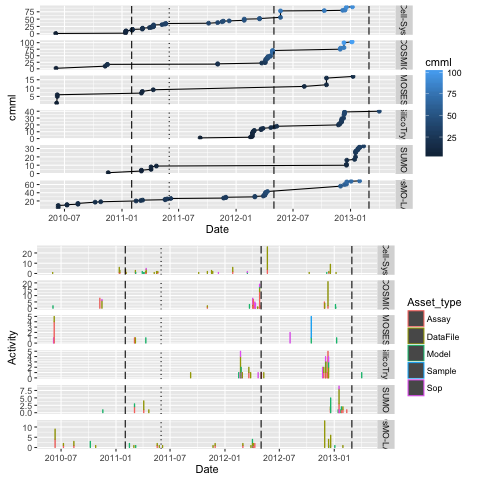

In [14]:
%%R -o projectLog 
projectLog<-getLogBy("create",239)


graphLogs2<-function(type,xuser){
    library(ggplot2)
    library(dplyr)

    ds<-getLogBy(type,xuser)

#     if(type == "create"){
     ds<-ds[(ds$action %in% c("create")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Publication")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Study")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Presentation")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Investigation")),]
#     }

    
  
    
    ds <- as.data.table(ds)
    setkeyv(ds, cols=c('ncreated_at',"project_name","activity_loggable_type"))
    ds <- ds[, list(count=.N), by=c('ncreated_at',"project_name","activity_loggable_type")]

    
      ds<-ds[(ds$project_name %in% c("COSMIC", "SUMO", "MOSES","SysMO-LAB","SilicoTryp", "BaCell-SysMO")),]

    
    ds$Date<-ds$ncreated_at
    ds$Asset_type<-ds$activity_loggable_type
    ds$Activity<-ds$count
    dps_date<- as.Date("2011-06-01")
#     ds$Asset_type <- as.character(ds$Asset_type)
#     ds$Asset_type[ds$Asset_type != "Publication"] <- "X"    

#     ds$Asset_type[ds$Asset_type == "Publication"] <- "apublication"

    ds1 <- ds
    pdf <- ds1 %>% group_by(project_name) %>% arrange(Date)  %>% mutate(cmml = cumsum(Activity))
    print(names(ds))
    print((ds[(ds$activity_loggable_id %in% c(102)),]))
    


    sp <- ggplot(ds, aes(x=Date, y=Activity, group=Asset_type, color=Asset_type))  + geom_bar(stat="identity") 
    cal <- sp + facet_grid(project_name ~ . , scales="free_y")       + geom_vline(xintercept = as.numeric(eval11), linetype=5)   + geom_vline(xintercept = as.numeric(eval12), linetype=5)  + geom_vline(xintercept = as.numeric(eval13), linetype=5)   + geom_vline(xintercept = as.numeric(dps_date), linetype=3)
 
    sp2 <- ggplot(pdf, aes(x=Date, y=cmml))  +  geom_line() +  geom_point(aes(colour = cmml)) #+  geom_line( aes(x=Date, y=2*cmml)) #geom_histogram(aes(y = 3*..density..), alpha = 0.2, binwidth = 3) + stat_ecdf(aes(x = Activity))
    ca3 <-  sp2 + facet_grid(project_name ~ ., scales="free_y" )  + geom_vline(xintercept = as.numeric(eval11), linetype=5)   + geom_vline(xintercept = as.numeric(eval12), linetype=5)  + geom_vline(xintercept = as.numeric(eval13), linetype=5)   + geom_vline(xintercept = as.numeric(dps_date), linetype=3)
 
    
    
     multiplot(ca3,cal, cols=1)
    
}

graphLogs2("create",239)


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: ------------------------------------------------------------------------------

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘plyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summari

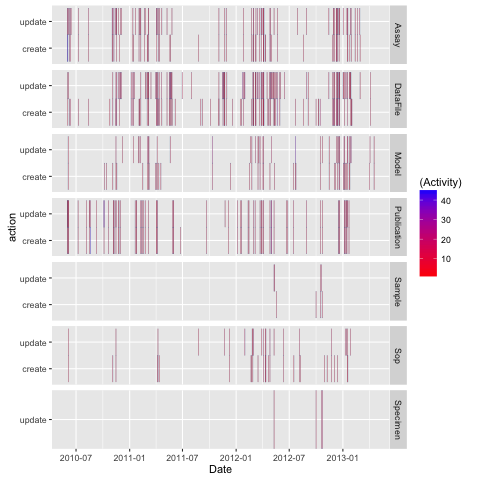

In [15]:
%%R -o projectLog 
projectLog<-getLogBy("create",239)

library(plyr)
graphLogs2<-function(type,xuser){
    library(ggplot2)

    ds<-getLogBy(type,xuser)

    if(type == "create"){
    # ds<-ds[!(ds$activity_loggable_type %in% c("Publication")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Study")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Presentation")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Investigation")),]
    }

    ds <- as.data.table(ds)
    setkeyv(ds, cols=c('ncreated_at',"project_name","activity_loggable_type","action"))
    ds <- ds[, list(count=.N), by=c('ncreated_at',"project_name","activity_loggable_type","action")]

    ds$Date<-ds$ncreated_at
    ds$Asset_type<-ds$activity_loggable_type
    ds$Activity<-ds$count
    ds$Asset_type <- as.character(ds$Asset_type)
#     ds$Asset_type[ds$Asset_type != "Publication"] <- "X"    
    dps_date<- as.Date("2011-06-01")
    
    sp <- ggplot(ds, aes(x=Date, y=Activity, color=action))  + geom_bar(stat="identity") #+ geom_point()
    sp   + geom_vline(xintercept = as.numeric(eval11), linetype=5) + geom_vline(xintercept = as.numeric(eval12), linetype=5) + geom_vline(xintercept = as.numeric(eval13) , linetype=5) + geom_vline(xintercept = as.numeric(dps_date), linetype=3)
#     sp   + facet_grid(action ~ . ) 
    
    
    sp <- ggplot(ds, aes(x=Date, y=action)) + geom_tile(aes(fill = (Activity)), colour = "steelblue") + scale_fill_gradient(low = "red",    high = "blue")
     sp + facet_grid(Asset_type ~ . , scales="free_y") 
    
    
#     ds.s <- ddply(ds, .(Date), transform, rescale = scale(Activity))
#     last_plot() %+% ds.s
}

graphLogs2("create",239)


In [ ]:
%%R

graphDSPEffect<-function(){
    # layout(matrix(c(1,2,3,4),2,2,))
    layout(matrix(c(1,2,3),1,2))

    data <-processCsv("data_files")

        ds<-getLogBy("create",239)
    
#     type <- "create"
#         if(type == "create"){
#         # ds<-ds[!(ds$activity_loggable_type %in% c("Publication")),]
#          ds<-ds[!(ds$activity_loggable_type %in% c("Study")),]
#          ds<-ds[!(ds$activity_loggable_type %in% c("Presentation")),]
#          ds<-ds[!(ds$activity_loggable_type %in% c("Investigation")),]
#         }    
#         data<-ds

       r <- data
 
    x<-graphVerDistribution(r)

     data <-processCsv("data_files")   
    
    r <- data[data$ncreated_at < "2011-06-05",]
    r <- r[r$ncreated_at > "2011-01-01",]
 
    b<-graphVerDistribution(r)




    mtext( "Before 2011-May", side=3)

    # Size distribution
    # data2 <-joinSize(data,"data_files")
    # r2 <- data2[data2$ncreated_at < "2011-05-05",]
    # graphFileSizeDistribution(r2)

    # mtext( "Distribution of Assets Size", side=2)

    data <-processCsv("data_files")

#         data<-ds
    r <- data[data$ncreated_at > "2011-06-07",]
    r <- r[r$ncreated_at < "2011-11-11",]
    a<-graphVerDistribution(r)

    test<-ks.test(a,b)

    print(test$p)

    #   data <- processCsv('models')
    #   r <- data[data$ncreated_at < "2011-05-05",]
    #   graphVerDistribution(r)
    #   
    #   
    #   r <- data[data$ncreated_at > "2011-05-05",]
    #   graphVerDistribution(r)
    mtext( "After 2011-May", side=3)
    mtext(paste("p-v=", round(test$p, digits = 3) ,""), side = 4)

    # Size distribution
    # r2 <- data2[data2$ncreated_at > "2011-05-05",]
    # graphFileSizeDistribution(r2)  

    return( (ks.test(a,b))
    )

}
graphDSPEffect()

The information about the Articles publication dates that apperar i nthe Fairdom page:
- are not in the XML
- Maybe in the database
- or maybe extracted directly 

If in the database i need that table

In [ ]:
pjlog = com.load_data('projectLog')

df = pjlog[pjlog['project_name'] == 'SUMO']
# df = df[df['ncreated_at'] <= 15276]
print df[df['activity_loggable_type'] == 'Publication'].head()

pjlog.hist()
#print df


## Projects Descriptive Information

- Diversity
- Files size
- Files contributed
- name

In [ ]:
%%R
projectContBySize()

In [5]:
%%R
processSharingReportDiscipline('model',5)
# graphActivty()
# graphFreq()
# graphCategories()

[1] "I need contributor_id guessDiscipline"
[1] "I need contributor_id guessDiscipline"
[1] 5 5
[1] 2
             disc qty          lab nData nMods   tab
1        modeller   0 intersharing     8     7 model
2        modeller   2  opensharing     8     7 model
3 experimentalist   0 intersharing     8     7 model
4 experimentalist   0  opensharing     8     7 model


In [13]:
%%R
graphSharingReportDiscipline('model',6)
graphMultiSharing(8)
x<- getOpenAssets("data_file",8)
print(x)

[1] "I need contributor_id guessDiscipline"
[1] "I need contributor_id guessDiscipline"
[1] 0
[1] "I need contributor_id guessDiscipline"
[1] "I need contributor_id guessDiscipline"
[1] 8
[1] 1
[1] "I need contributor_id guessDiscipline"
[1] "I need contributor_id guessDiscipline"
[1] 8 8 8 8 8 8 8 8 8
[1] 9
[1] "I need contributor_id guessDiscipline"
[1] "I need contributor_id guessDiscipline"
[1] 8 8 8 8 8 8 8
[1] 7
              disc qty          lab nData nMods       tab
1         modeller   0 intersharing     1     3     model
2         modeller   1  opensharing     1     3     model
3  experimentalist   0 intersharing     1     3     model
4  experimentalist   0  opensharing     1     3     model
5         modeller   0 intersharing     1     3 data_file
6         modeller   9  opensharing     1     3 data_file
7  experimentalist   0 intersharing     1     3 data_file
8  experimentalist   0  opensharing     1     3 data_file
9         modeller   0 intersharing     1     3       so